# Ranking offensive output of NBA guards
## Offensive Data
### Members:
Tejus Janakiraman (tejusj)
<br>
Zubin Joseph (zoobi)
<br>
Pranav SImha (nav01)
<br>
Davin Stephens (davincs)
<br>
Logan Ruscheinski (lruscheinski)

# Initial Description: 
Our intial goal is to quantify offensive impact of NBA guards and rank them based on a developed metric. We want to ensure the data is properly cleaned before we attempt to work on the data and answer our potential questions. 

# Potential Questions: 
Who is the NBA guard with the highest offensive output of all time? 
<br>
What is the best box statistic (basic stat ie. Points, rebounds, assists) to predict offensive output?
<br>
What actual metrics actually compares offensive output?
<br>
Should we consider the time spent as an NBA player for our ranking?

# Potential References 

These two sources will hopefully help us assess different strengths and weaknesses of various NBA guards. We will use this data to answer the potential questions and may help us think of new questions and relationships to consider. Basketball-reference contains a database of stats of every single player which allows us to see any trends over several years.

https://www.basketball-reference.com/
<br>
https://stathead.com/basketball/
<br>
https://www.kaggle.com/datasets/drgilermo/nba-players-stats?select=Seasons_Stats.csv

**Data:** This dataset gives us a variety of information regarding different mens NBA players. According to the source of the data set, the data spans from 1950 to 2017. Some key information in the data set includes: the year, name of the player, the player's position, their total points, and their different shooting percentages (2 point, 3 point, free throw). First, we have to read in the csv file, and print it to verify that the read was successful.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
csv = pd.read_csv('Seasons_Stats.csv')
csv

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


As an initial step of the data cleaning process, let's take a look at the different data types present in the data frame

In [2]:
csv.dtypes

Unnamed: 0      int64
Year          float64
Player         object
Pos            object
Age           float64
Tm             object
G             float64
GS            float64
MP            float64
PER           float64
TS%           float64
3PAr          float64
FTr           float64
ORB%          float64
DRB%          float64
TRB%          float64
AST%          float64
STL%          float64
BLK%          float64
TOV%          float64
USG%          float64
blanl         float64
OWS           float64
DWS           float64
WS            float64
WS/48         float64
blank2        float64
OBPM          float64
DBPM          float64
BPM           float64
VORP          float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
2P            float64
2PA           float64
2P%           float64
eFG%          float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB       

For the purpose of our research questions,and to narrow down the amount of players, we decided that we want to only focus on the data in the 3 point era. The 3 point line was established in 1980, so we want to eliminate any players in the data set that played before 1980.

In [3]:
csv = csv[~pd.isna(csv['3P'])]
csv['3P'].iloc[:20]

5727     0.0
5728     0.0
5729     0.0
5730     4.0
5731     0.0
5732     1.0
5733     0.0
5734    16.0
5735     1.0
5736     0.0
5737    73.0
5738     0.0
5739     0.0
5740     0.0
5741     8.0
5742     0.0
5743     1.0
5744     0.0
5745     1.0
5746    10.0
Name: 3P, dtype: float64

In [4]:
csv

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5727,5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
5728,5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
5729,5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
5730,5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5731,5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


As we can tell from the printed statements above, we were succesfully able to remove all the players who played before 1980. We can tell this because the years now start at 1980 and the NaN values are no longer present in the data frame column '3P'.

The next item is to only have players that were guards, (PG or SG). This will allow for a more accurate comparison between player stats. For example, the highest percentage shooters are almost always centers, or players closer to the basket as they take closer shots. 

In [5]:
positions = ['PG', 'SG']
newCSV = csv.loc[csv['Pos'].isin(positions)] 
newCSV

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5730,5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5732,5732,1980.0,Gus Bailey,SG,28.0,WSB,20.0,NaN,180.0,9.3,...,0.385,6.0,22.0,28.0,26.0,7.0,4.0,11.0,18.0,38.0
5741,5741,1980.0,Billy Ray,SG,23.0,POR,16.0,NaN,235.0,24.1,...,0.718,13.0,16.0,29.0,31.0,14.0,2.0,20.0,26.0,180.0
5746,5746,1980.0,Del Beshore,PG,23.0,CHI,68.0,NaN,869.0,6.4,...,0.667,16.0,47.0,63.0,139.0,58.0,5.0,104.0,105.0,244.0
5747,5747,1980.0,Henry Bibby,PG,30.0,PHI,82.0,NaN,2035.0,11.1,...,0.790,65.0,143.0,208.0,307.0,62.0,6.0,147.0,161.0,739.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24669,24669,2017.0,Lou Williams,SG,30.0,HOU,23.0,0.0,591.0,15.4,...,0.867,12.0,58.0,70.0,56.0,15.0,9.0,40.0,25.0,343.0
24681,24681,2017.0,Delon Wright,PG,24.0,TOR,27.0,0.0,446.0,15.0,...,0.764,16.0,32.0,48.0,57.0,27.0,11.0,25.0,31.0,150.0
24682,24682,2017.0,James Young,SG,21.0,BOS,29.0,0.0,220.0,10.0,...,0.667,6.0,20.0,26.0,4.0,10.0,2.0,4.0,15.0,68.0
24683,24683,2017.0,Joe Young,PG,24.0,IND,33.0,0.0,135.0,11.4,...,0.733,1.0,16.0,17.0,15.0,4.0,0.0,5.0,5.0,68.0


In here, we remove much of the bulk which does not contribute to our important numerical data.

In [6]:
newCSV.index = newCSV.Player
newCSV.drop('Age', inplace=True, axis=1)
newCSV.drop('Pos', inplace=True, axis=1)
newCSV.drop('Player', inplace=True, axis=1)
newCSV = newCSV[newCSV.Year >= 2004]
newCSV.drop('Year', inplace=True, axis=1)
newCSV.drop('Unnamed: 0', inplace=True, axis=1)
newCSV.drop('Tm', inplace=True, axis=1)
newCSV.drop("blank2", inplace=True, axis=1)
newCSV

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\logan\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Ray Allen,56.0,56.0,2152.0,21.7,0.566,0.372,0.266,3.8,11.8,7.8,...,0.904,69.0,217.0,286.0,268.0,71.0,11.0,156.0,132.0,1287.0
Rafer Alston,82.0,28.0,2581.0,13.7,0.509,0.568,0.175,1.2,9.1,5.1,...,0.769,26.0,200.0,226.0,372.0,114.0,18.0,128.0,212.0,838.0
Derek Anderson,51.0,46.0,1810.0,15.1,0.499,0.423,0.307,1.7,10.2,6.0,...,0.824,26.0,156.0,182.0,228.0,66.0,3.0,90.0,79.0,694.0
Kenny Anderson,44.0,31.0,905.0,11.1,0.473,0.016,0.188,2.5,8.2,5.3,...,0.729,19.0,62.0,81.0,125.0,26.0,5.0,50.0,73.0,262.0
Shandon Anderson,80.0,37.0,1974.0,10.1,0.500,0.227,0.285,3.1,9.7,6.5,...,0.764,53.0,169.0,222.0,122.0,68.0,17.0,118.0,182.0,635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lou Williams,23.0,0.0,591.0,15.4,0.547,0.489,0.428,2.2,10.7,6.5,...,0.867,12.0,58.0,70.0,56.0,15.0,9.0,40.0,25.0,343.0
Delon Wright,27.0,0.0,446.0,15.0,0.535,0.259,0.474,4.1,8.1,6.1,...,0.764,16.0,32.0,48.0,57.0,27.0,11.0,25.0,31.0,150.0
James Young,29.0,0.0,220.0,10.0,0.549,0.603,0.155,3.1,10.0,6.6,...,0.667,6.0,20.0,26.0,4.0,10.0,2.0,4.0,15.0,68.0


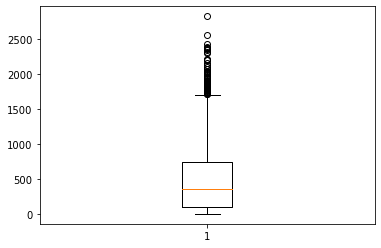

In [7]:
ax = plt.boxplot(newCSV['PTS'])

In [8]:
percentData = newCSV
percentData.drop("G", inplace=True, axis=1)
percentData.drop("GS", inplace=True, axis=1)
percentData.drop("MP", inplace=True, axis=1)
percentData.drop("PER", inplace=True, axis=1)
percentData.drop("3PAr", inplace=True, axis=1)
percentData.drop("FTr", inplace=True, axis=1)
percentData.drop("blanl", inplace=True, axis=1)
percentData.drop("OWS", inplace=True, axis=1)
percentData.drop("DWS", inplace=True, axis=1)
percentData.drop("WS", inplace=True, axis=1)
percentData.drop("WS/48", inplace=True, axis=1)
percentData.drop("OBPM", inplace=True, axis=1)
percentData.drop("DBPM", inplace=True, axis=1)
percentData.drop("BPM", inplace=True, axis=1)
percentData.drop("VORP", inplace=True, axis=1)
percentData.drop("FG", inplace=True, axis=1)
percentData.drop("FGA", inplace=True, axis=1)
percentData.drop("2PA", inplace=True, axis=1)
percentData.drop("2P", inplace=True, axis=1)
percentData.drop("3PA", inplace=True, axis=1)
percentData.drop("3P", inplace=True, axis=1)
percentData.drop("DRB", inplace=True, axis=1)
percentData.drop("ORB", inplace=True, axis=1)
percentData.drop("TRB", inplace=True, axis=1)
percentData.drop("AST", inplace=True, axis=1)
percentData.drop("STL", inplace=True, axis=1)
percentData.drop("BLK", inplace=True, axis=1)
percentData.drop("TOV", inplace=True, axis=1)
percentData.drop("PF", inplace=True, axis=1)
percentData.drop("PTS", inplace=True, axis=1)
percentData.drop("FT", inplace=True, axis=1)
percentData.drop("FTA", inplace=True, axis=1)
percentData

C:\Users\logan\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,TS%,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,FG%,3P%,2P%,eFG%,FT%
Player,,,,,,,,,,,,,,
Ray Allen,0.566,3.8,11.8,7.8,23.3,1.8,0.4,12.1,27.8,0.440,0.392,0.468,0.512,0.904
Rafer Alston,0.509,1.2,9.1,5.1,24.9,2.4,0.6,13.5,17.3,0.376,0.371,0.382,0.481,0.769
Derek Anderson,0.499,1.7,10.2,6.0,21.1,2.0,0.1,11.5,20.5,0.376,0.305,0.428,0.440,0.824
Kenny Anderson,0.473,2.5,8.2,5.3,24.2,1.6,0.4,15.3,17.1,0.441,0.250,0.444,0.443,0.729
Shandon Anderson,0.500,3.1,9.7,6.5,10.2,1.8,0.7,15.7,17.7,0.422,0.281,0.463,0.454,0.764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lou Williams,0.547,2.2,10.7,6.5,14.3,1.2,1.2,11.3,25.3,0.386,0.318,0.452,0.464,0.867
Delon Wright,0.535,4.1,8.1,6.1,18.2,3.1,2.1,15.1,16.6,0.422,0.333,0.453,0.466,0.764
James Young,0.549,3.1,10.0,6.6,2.6,2.3,0.7,6.1,13.3,0.431,0.343,0.565,0.534,0.667


In [17]:
corr = percentData.corr()
corr.style.background_gradient(cmap='coolwarm')

,TS%,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,FG%,3P%,2P%,eFG%,FT%
TS%,1.000000,0.019746,0.035701,0.049089,0.091180,-0.005622,0.025948,-0.096480,0.144129,0.887828,0.608628,0.722381,0.935704,0.412041
ORB%,0.019746,1.000000,0.119057,0.649642,-0.125471,0.029925,0.117967,-0.052661,0.103378,0.091302,-0.128597,0.051969,0.006427,-0.166411
DRB%,0.035701,0.119057,1.000000,0.826866,-0.018074,0.036713,0.162063,0.019980,0.014396,0.038393,-0.045418,0.042671,0.006410,-0.062067
TRB%,0.049089,0.649642,0.826866,1.000000,-0.084254,0.035762,0.179678,-0.016650,0.065839,0.092337,-0.090773,0.072530,0.021718,-0.122882
AST%,0.091180,-0.125471,-0.018074,-0.084254,1.000000,0.190541,-0.097116,0.299371,0.290687,0.133232,-0.008223,0.098276,0.050608,0.074354
STL%,-0.005622,0.029925,0.036713,0.035762,0.190541,1.000000,0.108372,0.111715,0.028946,0.028115,-0.053541,0.000114,-0.022813,-0.077515
BLK%,0.025948,0.117967,0.162063,0.179678,-0.097116,0.108372,1.000000,0.044180,-0.002098,0.059590,-0.065845,0.068429,0.029089,-0.088237
TOV%,-0.096480,-0.052661,0.019980,-0.016650,0.299371,0.111715,0.044180,1.000000,-0.092469,-0.016010,-0.157122,-0.011819,-0.080292,-0.131796
USG%,0.144129,0.103378,0.014396,0.065839,0.290687,0.028946,-0.002098,-0.092469,1.000000,0.150148,0.069165,0.101853,0.090286,0.120400
FG%,0.887828,0.091302,0.038393,0.092337,0.133232,0.028115,0.059590,-0.016010,0.150148,1.000000,0.437718,0.854061,0.926271,0.153513


Correlation exists between several categories. TS% and FG%, TS% and 3P%, 2P% and TS%, TS% and eFG%, ORB% and TRB%, DRB% and TRB%, FG% and 2P%, FG% and eFG%. All of which have a positive correlation value of at least 0.65.

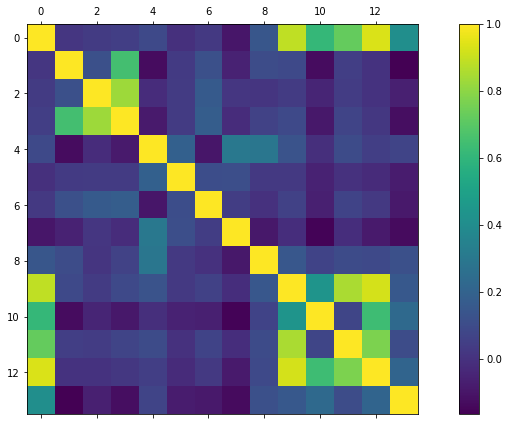

In [16]:
corrM = plt.figure(figsize=(15,7))
plt.matshow(percentData.corr(), fignum=corrM.number)
cb = plt.colorbar()
plt.show()